#### <font color = 'purple'> Natural Language Processing for Sentiment Analysis using Multiple Models


###### Prepared by: `Olanrewaju Adegoke`

##### <font color = 'cyan'> About the dataset:

List of tweet texts with emotion labels like joy, sadness, fear, anger...
Dataset is split into train, test and validation sets for building the machine learning model.
The validation set will be use to check the final performance of the algorithm (to make sure there is no overfitting over the test data).

##### <font color = 'cyan'> The Goal:
• Train different kind of models able to classify each text according to the sentiment mainly present
in it.

• Compare the results of the different models and try to analyze and explain the differences.


##### <font color = 'cyan'> Project Deliverables:

Train different classification models relying mainly on the following:

1. A Fully Connected Neural Network.

2. A Recurrent Neural Network, based on LSTM or GRU.

3. A fine-tuned Transformer Architecture from a pretrained model that can be found on sites like HuggingFace.

4. Compare the different models to find the best approach and explained what you have learnt from this exercise and how would you proceed with another text classification use case.

##### <font color = 'cyan'> Import the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional, GRU, Flatten,Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from transformers import BertTokenizer, TFBertForSequenceClassification

##### <font color = 'cyan'> Mounting the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


###### <font color = 'cyan'> Defining the paths to the folders

In [ ]:
data_path = '/content/drive/MyDrive/Natural_Language_Processing/Final_Project/data/'
train_data = 'train.txt'
test_data = 'test.txt'
val_data = 'validation.txt'

model_path = '/content/drive/MyDrive/Natural_Language_Processing/Final_Project/models/'

##### <font color = 'cyan'> Loading the training dataset

In [ ]:
train_df = pd.read_csv(data_path + train_data, header=None, sep=';', names=['tweets', 'sentiments'])
train_df.head()

,tweets,sentiments
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


##### <font color = 'cyan'> Loading the test dataset

In [ ]:
file_path = data_path + test_data

# Read the .txt file line by line
with open(file_path, 'r') as f:
    lines = f.readlines()

# Split the lines into 'tweets' and 'sentiments' columns based on delimiter ';'
tweets_list = [tuple(line.strip().split(';')) for line in lines]

# Create a DataFrame from the list
test_df = pd.DataFrame(tweets_list, columns=['tweets', 'sentiments'])

# Display the DataFrame
test_df.head(10)


,tweets,sentiments
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness
5,i cant walk into a shop anywhere where i do no...,fear
6,i felt anger when at the end of a telephone call,anger
7,i explain why i clung to a relationship with a...,joy
8,i like to have the same breathless feeling as ...,joy
9,i jest i feel grumpy tired and pre menstrual w...,anger


###### <font color = 'cyan'> Loading the validation dataset

In [ ]:
val_df = pd.read_csv(data_path + val_data, header=None, sep=';', names=['tweets', 'sentiments'])
val_df.head()

,tweets,sentiments
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


## <font color = 'cyan'> Preprocessing of the tweets and sentiments data

We would be preprocessing the datasets into numnerical data

In [ ]:
len(train_df), len(test_df)

(16000, 2000)

##### <font color = 'cyan'> Training set Preprocessing

In [ ]:
max_words = len(train_df)
print(max_words)

max_length = train_df['tweets'].apply(len).max()
print(max_length)

16000
300


In [ ]:
# Convert the train_df to an array
X_train_arr = train_df['tweets'].values
y_train_arr = train_df['sentiments'].values

##### <font color = 'cyan'> Label Encoding for training set

In [ ]:
# Convert the label which is sentiments to numerical values
label_encoder = LabelEncoder()
y_train_arr = to_categorical(label_encoder.fit_transform(y_train_arr))
y_train_arr

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

###### <font color = 'cyan'> Tokenization of sequence and padding for training set.

###### <font color = 'cyan'> One_Hot Encoding

In [ ]:
# Tokenize and Pad Sequences
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train_arr)
word_index = tokenizer.word_index

# Sequence tokenizing
X_train_seq = tokenizer.texts_to_sequences(X_train_arr)

# Sequence padding
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length)
X_train_pad[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

##### <font color = 'cyan'> Test set Preprocessing

In [ ]:
# Convert the test_df to an array
X_test_arr = test_df['tweets'].values
y_test_arr = test_df['sentiments'].values

##### <font color = 'cyan'> Label Encoding for test set

In [ ]:
# Convert the label which is sentiments to numerical values
y_test_arr = to_categorical(label_encoder.transform(y_test_arr))
y_test_arr

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

##### <font color = 'cyan'> Tokenization of sequence and padding for test set - One_Hot_Encoding

In [ ]:
# Sequence tokenizing
X_test_seq = tokenizer.texts_to_sequences(X_test_arr)

# Sequence padding
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length)
X_test_pad[1]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

###### <font color = 'cyan'> Validation set Preprocessing

In [ ]:
# Convert the test_df to an array
X_val_arr = val_df['tweets'].values
y_val_arr = val_df['sentiments'].values

###### <font color = 'cyan'> Label encoding for validation set

In [ ]:
# Convert the label which is sentiments to numerical values
y_val_arr = to_categorical(label_encoder.transform(y_val_arr))
y_val_arr

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

##### <font color = 'cyan'> Tokenization of sequence and padding for validation set

In [ ]:
# Sequence tokenizing
X_val_seq = tokenizer.texts_to_sequences(X_val_arr)

# Sequence padding
X_val_pad = pad_sequences(X_val_seq, maxlen=max_length)
X_val_pad[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

#### <font color = 'green'> 1. Classification model relying on a Fully Connected Neural Network (FCNN)

##### <font color = 'cyan'> Building the FCNN Model

In [ ]:
model_nn = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_words, output_dim=50, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

###### <font color = 'cyan'> summarizing the total and trainable and non-trainable parameters from the model:

In [ ]:
model_nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 50)           800000    
                                                                 
 flatten (Flatten)           (None, 15000)             0         
                                                                 
 dense (Dense)               (None, 128)               1920128   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                                 
Total params: 2728774 (10.41 MB)
Trainable params: 27287

##### <font color = 'cyan'> Compile the neural network model

##### <font color = 'cyan'> **optimizer = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)**

##### <font color = 'cyan'> **optimizer = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)**

##### <font color = 'cyan'> **optimizer = tf.keras.optimizers.Adagrad(lr=0.001)**

##### <font color = 'cyan'> **optimizer = tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9)**

##### <font color = 'cyan'> **optimizer = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)**

##### <font color = 'cyan'> **optimizer = tf.keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999)**

##### <font color = 'cyan'> **model.compile(loss='binary_crossentropy', optimizer=optimizer)**

In [ ]:
model_nn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

##### <font color = 'cyan'> Training the Model

In [ ]:
# Paramenters for the model
EPOCHS = 10
BATCHSIZE = 32

In [ ]:
history = model_nn.fit(X_train_pad, y_train_arr, epochs=EPOCHS, batch_size=BATCHSIZE, validation_data=(X_val_pad, y_val_arr))

Epoch 1/10
500/500 [==============================] - 27s 47ms/step - loss: 1.5331 - accuracy: 0.3369 - val_loss: 1.2423 - val_accuracy: 0.4380
Epoch 2/10
500/500 [==============================] - 5s 10ms/step - loss: 0.7504 - accuracy: 0.7199 - val_loss: 0.5673 - val_accuracy: 0.7990
Epoch 3/10
500/500 [==============================] - 4s 8ms/step - loss: 0.2882 - accuracy: 0.9009 - val_loss: 0.5868 - val_accuracy: 0.8265
Epoch 4/10
500/500 [==============================] - 4s 8ms/step - loss: 0.1506 - accuracy: 0.9500 - val_loss: 0.5792 - val_accuracy: 0.8525
Epoch 5/10
500/500 [==============================] - 3s 6ms/step - loss: 0.0871 - accuracy: 0.9728 - val_loss: 0.6333 - val_accuracy: 0.8540
Epoch 6/10
500/500 [==============================] - 3s 5ms/step - loss: 0.0580 - accuracy: 0.9820 - val_loss: 0.8061 - val_accuracy: 0.8375
Epoch 7/10
500/500 [==============================] - 3s 5ms/step - loss: 0.0460 - accuracy: 0.9866 - val_loss: 0.8663 - val_accuracy: 0.8390
Epo

###### <font color = 'cyan'> Evaluate the performance of the model

In [ ]:
# Evaluate the model
nn_test_loss, nn_test_accuracy = model_nn.evaluate(X_test_pad, y_test_arr)
print('\nFCNN Test Accuracy is', str(round((nn_test_accuracy * 100),2)) + "%")

63/63 [==============================] - 0s 3ms/step - loss: 0.9682 - accuracy: 0.8205

FCNN Test Accuracy is 82.05%


###### <font color = 'cyan'> Building the functions for Visualization of the results of the model

In [ ]:
def plot_results(history):
    hist_df = pd.DataFrame(history.history)
    hist_df.columns=["loss", "accuracy", "val_loss", "val_accuracy"]
    hist_df.index = np.arange(1, len(hist_df)+1)

    fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(16, 10))
    axs[0].plot(hist_df.val_accuracy, lw=3, label='Validation Accuracy')
    axs[0].plot(hist_df.accuracy, lw=3, label='Training Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].grid()
    axs[0].legend(loc=0)
    axs[1].plot(hist_df.val_loss, lw=3, label='Validation Loss')
    axs[1].plot(hist_df.loss, lw=3, label='Training Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].grid()
    axs[1].legend(loc=0)

    plt.show();

In [ ]:
def visualization(history):

  # Plot training and validation accuracy values
  plt.figure(figsize=(15, 6))
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'], label='Training Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.title('Training and Validation Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  # Plot training and validation loss values
  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

  # Show the plots
  plt.tight_layout()
  plt.show()

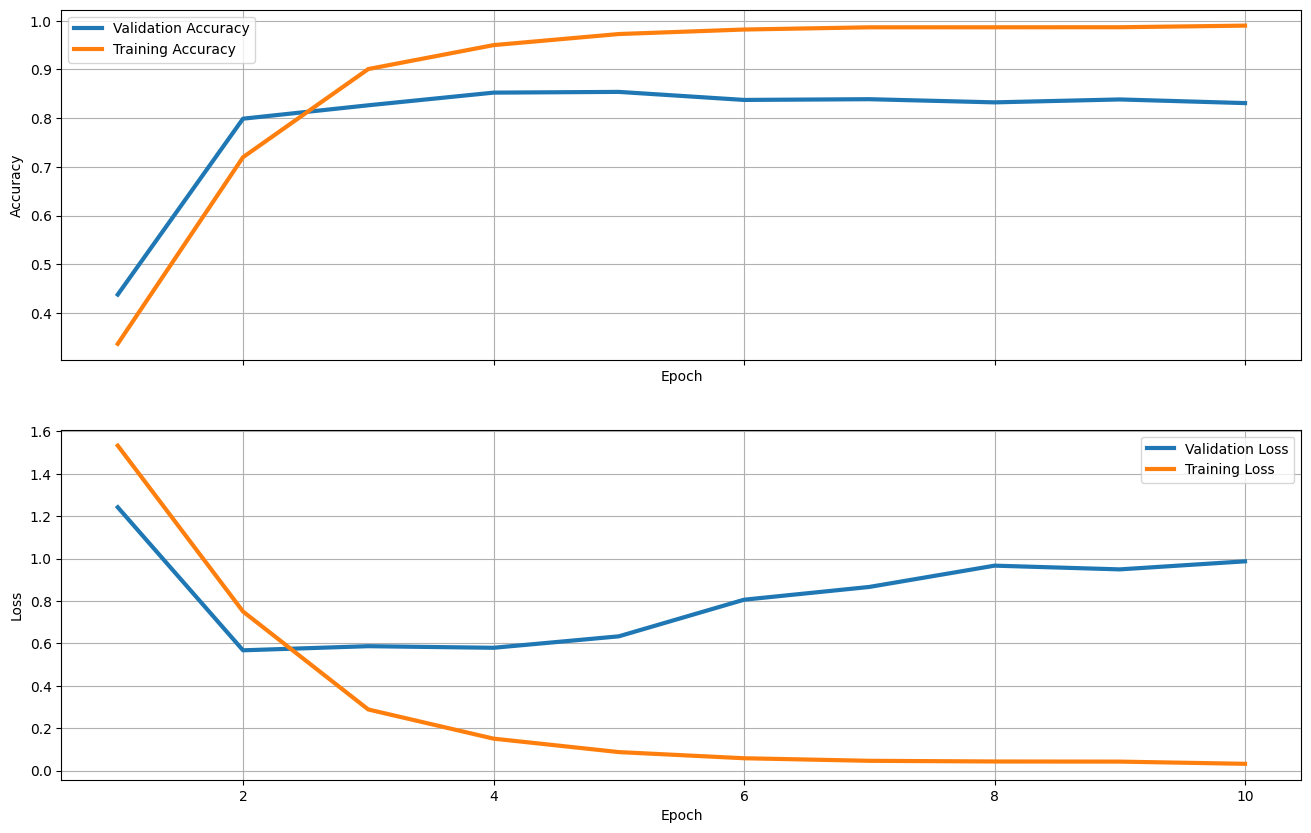

In [ ]:
plot_results(history)

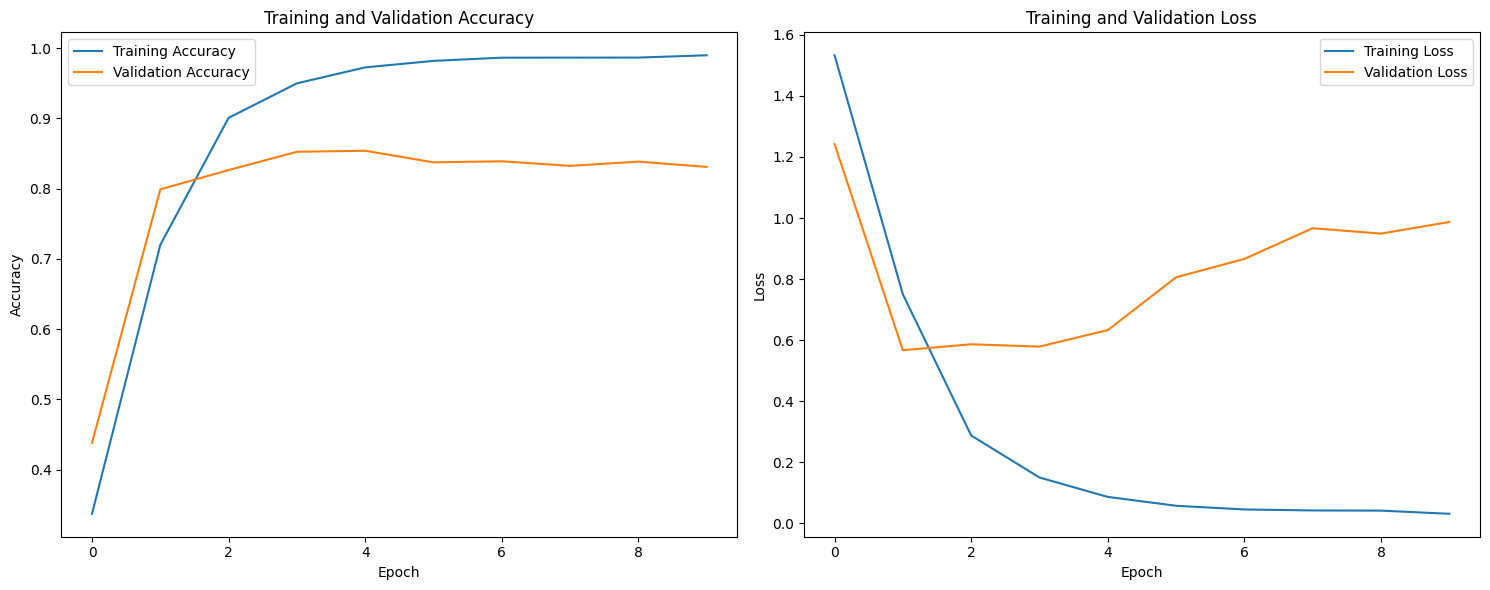

In [ ]:
visualization(history)

#### <font color = 'cyan'> Model with tunned optimizer

In [ ]:
model_nn_opt = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_words, output_dim=50, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

In [ ]:
model_nn_opt.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 50)           800000    
                                                                 
 flatten_1 (Flatten)         (None, 15000)             0         
                                                                 
 dense_3 (Dense)             (None, 128)               1920128   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 6)                 390       
                                                                 
Total params: 2728774 (10.41 MB)
Trainable params: 272

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
model_nn_opt.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_nn_opt = model_nn_opt.fit(X_train_pad, y_train_arr, epochs=EPOCHS, batch_size=BATCHSIZE, validation_data=(X_val_pad, y_val_arr))

Epoch 1/10
500/500 [==============================] - 15s 28ms/step - loss: 1.6069 - accuracy: 0.3164 - val_loss: 1.5890 - val_accuracy: 0.2750
Epoch 2/10
500/500 [==============================] - 5s 10ms/step - loss: 1.5832 - accuracy: 0.3286 - val_loss: 1.5821 - val_accuracy: 0.3520
Epoch 3/10
500/500 [==============================] - 3s 5ms/step - loss: 1.5819 - accuracy: 0.3314 - val_loss: 1.5817 - val_accuracy: 0.3520
Epoch 4/10
500/500 [==============================] - 3s 6ms/step - loss: 1.5787 - accuracy: 0.3327 - val_loss: 1.5856 - val_accuracy: 0.2870
Epoch 5/10
500/500 [==============================] - 3s 5ms/step - loss: 1.5784 - accuracy: 0.3334 - val_loss: 1.5819 - val_accuracy: 0.3520
Epoch 6/10
500/500 [==============================] - 3s 6ms/step - loss: 1.5783 - accuracy: 0.3353 - val_loss: 1.5808 - val_accuracy: 0.3520
Epoch 7/10
500/500 [==============================] - 3s 6ms/step - loss: 1.5768 - accuracy: 0.3345 - val_loss: 1.5813 - val_accuracy: 0.3520
Epo

In [ ]:
# Evaluate the model
nn_opt_test_loss, nn_opt_test_accuracy = model_nn_opt.evaluate(X_test_pad, y_test_arr)
print('\nModel_nn_opt Test Accuracy is', str(round((nn_opt_test_accuracy * 100),2)) + "%")

63/63 [==============================] - 0s 2ms/step - loss: 1.5608 - accuracy: 0.3515

Model_nn_opt Test Accuracy is 35.15%


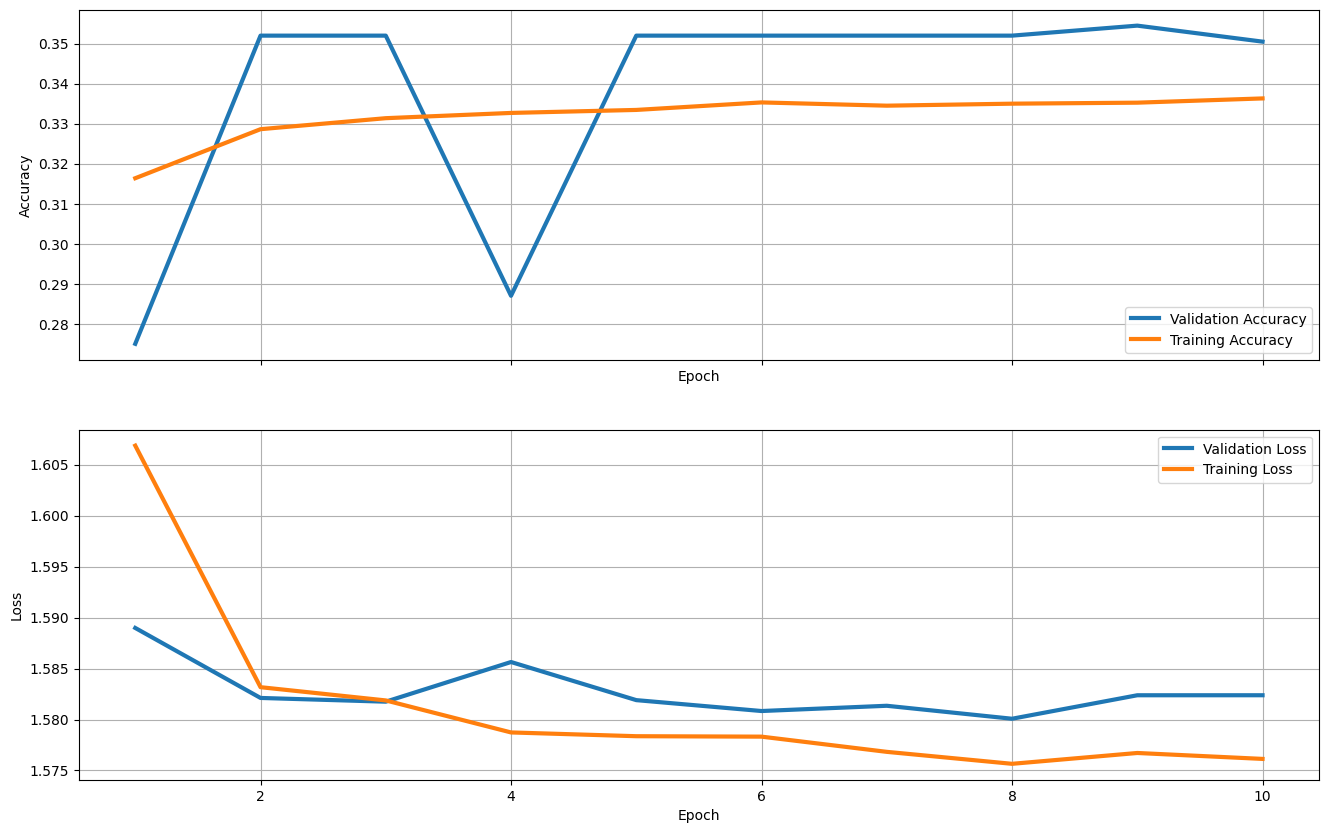

In [ ]:
plot_results(history_nn_opt)

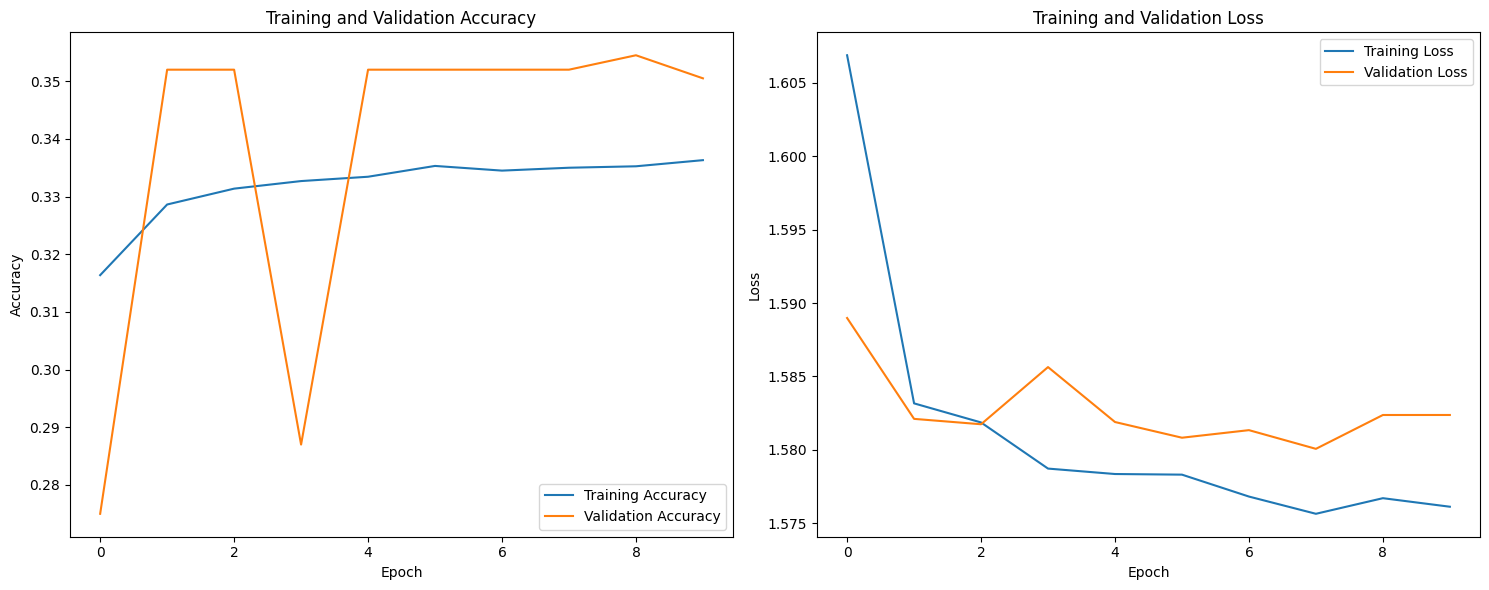

In [ ]:
visualization(history_nn_opt)

#### <font color = 'green'> 2. Recurrent Neural Network based on Long Short-Term Memory (LSTM) and Gated Recurrent Unit (GRU)

##### <font color = 'cyan'> Build the RNN model with LSTM

In [ ]:
model_lstm = tf.keras.Sequential([
    Embedding(input_dim=max_words, output_dim=50, input_length=max_length),
    Bidirectional(LSTM(128, activation='tanh', recurrent_activation='sigmoid', unroll=True)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

##### <font color = 'cyan'> Model Summary:

In [ ]:
model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 300, 50)           800000    
                                                                 
 bidirectional (Bidirection  (None, 256)               183296    
 al)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                16448     
                                                                 
 dense_7 (Dense)             (None, 6)                 390       
                                                                 
Total params: 1000134 (3.82 MB)
Trainable params: 1000134 (3.82 MB)
Non-trainable params: 0 (0.00 Byte)
________________

##### <font color = 'cyan'> Compile the RNN based on LSTM model

In [ ]:
model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

###### <font color = 'cyan'> Training the LSTM model

In [ ]:
history_lstm = model_lstm.fit(X_train_pad, y_train_arr, epochs=EPOCHS, batch_size=BATCHSIZE, validation_data=(X_val_pad, y_val_arr))

Epoch 1/10
500/500 [==============================] - 154s 217ms/step - loss: 1.2674 - accuracy: 0.4837 - val_loss: 0.7543 - val_accuracy: 0.7205
Epoch 2/10
500/500 [==============================] - 87s 173ms/step - loss: 0.4519 - accuracy: 0.8388 - val_loss: 0.3254 - val_accuracy: 0.8995
Epoch 3/10
500/500 [==============================] - 88s 176ms/step - loss: 0.2110 - accuracy: 0.9288 - val_loss: 0.2643 - val_accuracy: 0.9135
Epoch 4/10
500/500 [==============================] - 87s 174ms/step - loss: 0.1318 - accuracy: 0.9545 - val_loss: 0.2486 - val_accuracy: 0.9145
Epoch 5/10
500/500 [==============================] - 85s 170ms/step - loss: 0.0905 - accuracy: 0.9683 - val_loss: 0.2538 - val_accuracy: 0.9160
Epoch 6/10
500/500 [==============================] - 85s 169ms/step - loss: 0.0753 - accuracy: 0.9732 - val_loss: 0.2928 - val_accuracy: 0.9115
Epoch 7/10
500/500 [==============================] - 85s 169ms/step - loss: 0.0660 - accuracy: 0.9764 - val_loss: 0.2757 - val_a

###### <font color = 'cyan'> Evaluate the LSTM model on the Test set

In [ ]:
lstm_test_loss, lstm_test_accuracy = model_lstm.evaluate(X_test_pad, y_test_arr)
print('\nlstm Test Accuracy is', str(round((lstm_test_accuracy * 100),2)) + "%")

63/63 [==============================] - 5s 74ms/step - loss: 0.2649 - accuracy: 0.9185

lstm Test Accuracy is 91.85%


###### <font color = 'cyan'> Visualize the lstm model results

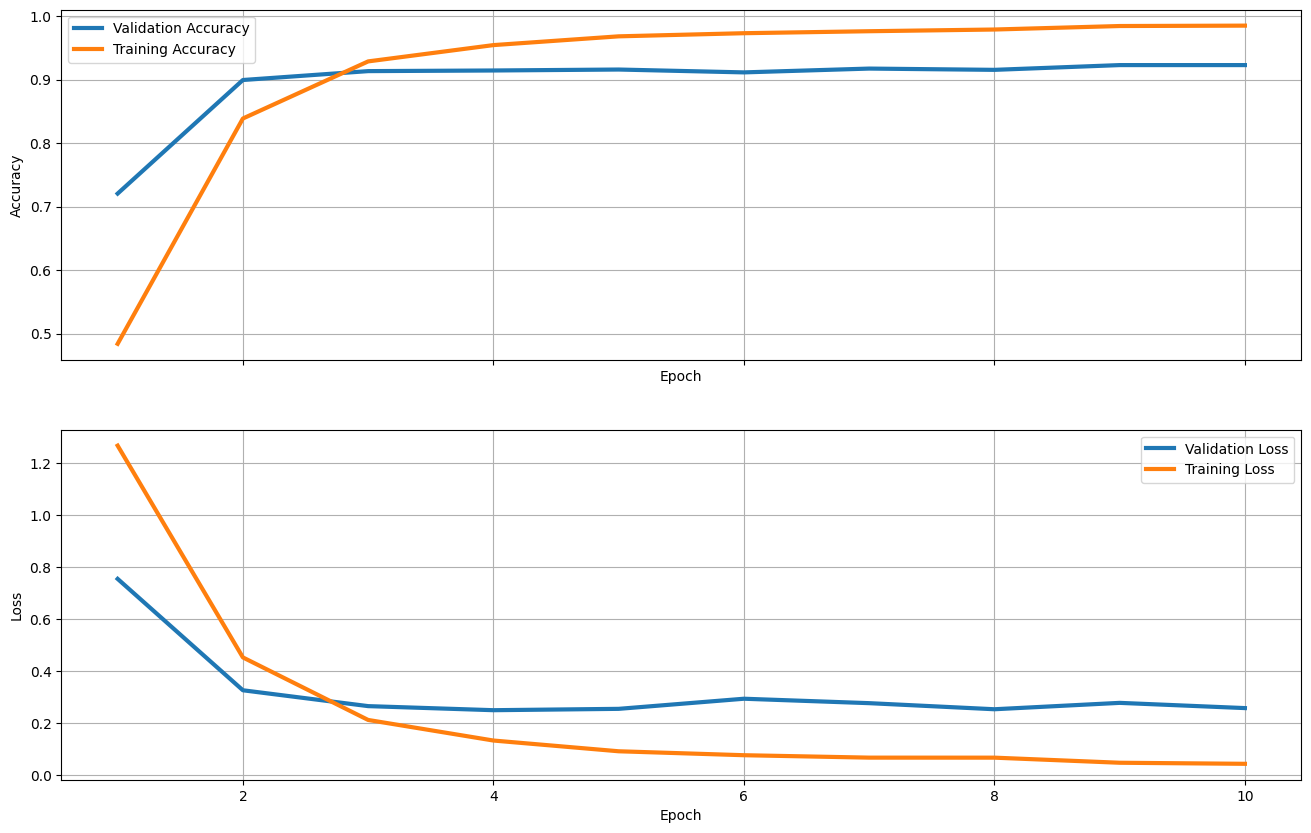

In [ ]:
plot_results(history_lstm)

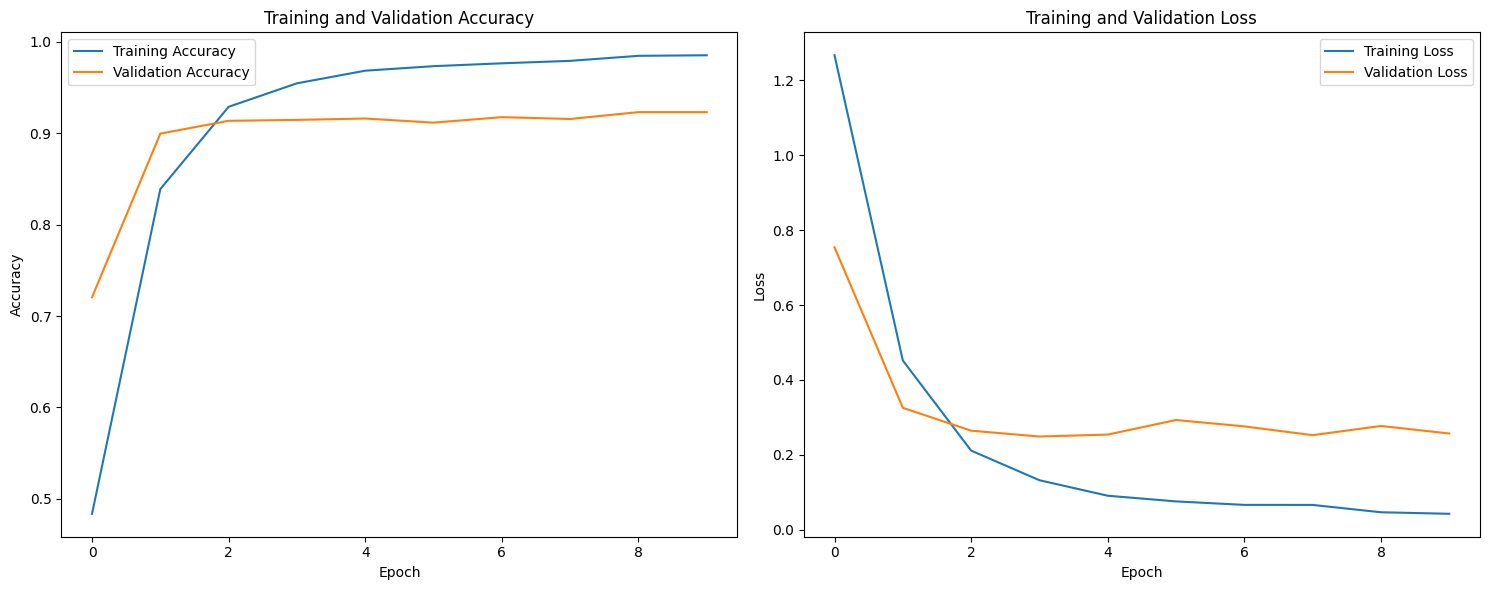

In [ ]:
visualization(history_lstm)

##### <font color = 'cyan'> Building the RNN model with Gated Recurrent Unit (GRU)

In [ ]:
def build_rnn_with_gru_model():

  model_gru = tf.keras.Sequential([
  Embedding(input_dim=max_words, output_dim=50, input_length=max_length),
  Bidirectional(GRU(128, activation='tanh', recurrent_activation='sigmoid', unroll=True)),
  Dropout(0.5),
  Dense(64, activation='relu'),
  Dense(len(label_encoder.classes_), activation='softmax')
  ])
  return model_gru

###### <font color = 'cyan'> Build and compile gru model

In [ ]:
model_gru = build_rnn_with_gru_model()
model_gru.summary()
model_gru.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 300, 50)           800000    
                                                                 
 bidirectional_1 (Bidirecti  (None, 256)               138240    
 onal)                                                           
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                16448     
                                                                 
 dense_9 (Dense)             (None, 6)                 390       
                                                                 
Total params: 955078 (3.64 MB)
Trainable params: 955078 (3.64 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

###### <font color = 'cyan'> Training the RNN with GRU model

In [ ]:
history_gru = model_gru.fit(X_train_pad, y_train_arr, epochs=EPOCHS, batch_size=BATCHSIZE, validation_data=(X_val_pad, y_val_arr))

Epoch 1/10
500/500 [==============================] - 192s 260ms/step - loss: 1.1841 - accuracy: 0.5277 - val_loss: 0.4671 - val_accuracy: 0.8380
Epoch 2/10
500/500 [==============================] - 104s 208ms/step - loss: 0.2822 - accuracy: 0.9044 - val_loss: 0.2231 - val_accuracy: 0.9235
Epoch 3/10
500/500 [==============================] - 104s 209ms/step - loss: 0.1468 - accuracy: 0.9426 - val_loss: 0.2257 - val_accuracy: 0.9235
Epoch 4/10
500/500 [==============================] - 102s 205ms/step - loss: 0.1087 - accuracy: 0.9584 - val_loss: 0.3082 - val_accuracy: 0.9085
Epoch 5/10
500/500 [==============================] - 104s 208ms/step - loss: 0.0951 - accuracy: 0.9643 - val_loss: 0.2207 - val_accuracy: 0.9220
Epoch 6/10
500/500 [==============================] - 103s 207ms/step - loss: 0.0811 - accuracy: 0.9701 - val_loss: 0.2343 - val_accuracy: 0.9255
Epoch 7/10
500/500 [==============================] - 104s 209ms/step - loss: 0.0579 - accuracy: 0.9787 - val_loss: 0.2680 -

###### <font color = 'cyan'> Evaluate the performance of the RNN with GRU model

In [ ]:
test_loss, test_accuracy = model_gru.evaluate(X_val_pad, y_val_arr)
print('\nGRU Test Accuracy is', str(round((test_accuracy * 100),2)) + "%")

63/63 [==============================] - 6s 91ms/step - loss: 0.2626 - accuracy: 0.9210

GRU Test Accuracy is 92.1%


##### <font color = 'cyan'> Visualize the RNN with GRU model performance

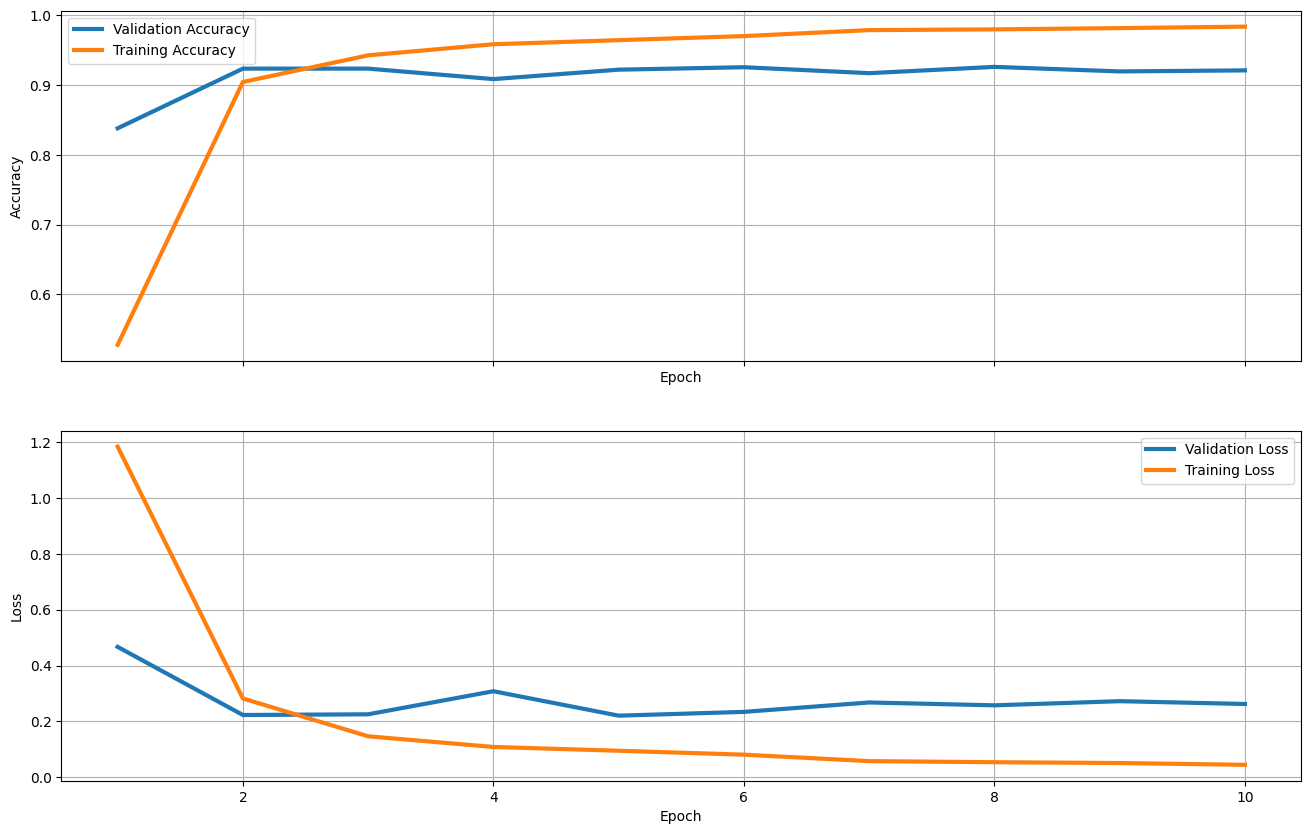

In [ ]:
plot_results(history_gru)

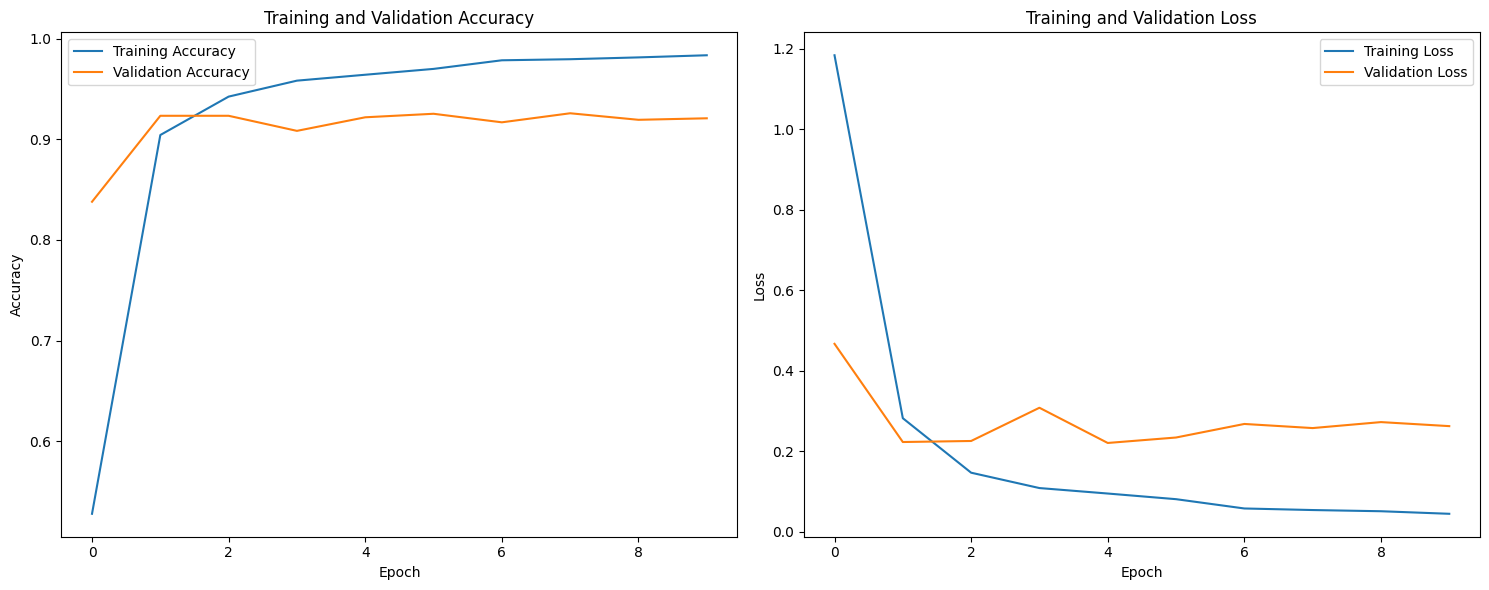

In [ ]:
visualization(history_gru)

#### <font color = 'green'>3. A fine-tuned Transformer Architecture from a pretrained model - Using Bidirectional Encoder Representations from Transformers (BERT)

In [ ]:
# Install the transformers

!pip install transformers

In [ ]:
# Reload the dataset

print(len(train_df),len(test_df),len(val_df))

16000 2000 2000


###### <font color = 'cyan'>  Defining the BERT model

In [ ]:
model_name = 'bert-base-uncased'

####  <font color = 'cyan'> Preprocessing the dataset

###### <font color = 'cyan'> Encoding the `sentiments - labels`

In [ ]:
label_encoder_FT = LabelEncoder()
train_df['sentiments'] = label_encoder_FT.fit_transform(train_df['sentiments'])
test_df['sentiments'] = label_encoder_FT.transform(test_df['sentiments'])
val_df['sentiments'] = label_encoder_FT.transform(val_df['sentiments'])

##### <font color = 'cyan'> Load the BERT tokenizer

In [ ]:
tokenizer = BertTokenizer.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

##### <font color = 'cyan'> Instantiate the Model

In [ ]:
model_bert = TFBertForSequenceClassification.from_pretrained(model_name, num_labels=len(label_encoder_FT.classes_))

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


##### <font color = 'cyan'> Tokenize the `tweets - sequences` and Sequence Padding

In [ ]:
train_encoding = tokenizer(train_df['tweets'].tolist(), truncation=True, padding=True)
test_encoding = tokenizer(test_df['tweets'].tolist(), truncation=True, padding=True)
val_encoding = tokenizer(val_df['tweets'].tolist(), truncation=True, padding=True)

print(len(train_encoding),len(test_encoding),len(val_encoding))

3 3 3


In [ ]:
train_encoding.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [ ]:
test_encoding.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [ ]:
val_encoding.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

###### <font color = 'cyan'>Creating the TensorFlow datasets

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encoding),
    train_df['sentiments'].tolist()
)).shuffle(100).batch(32)

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encoding),
    val_df['sentiments'].tolist()
)).batch(32)

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encoding),
    test_df['sentiments'].tolist()
)).batch(32)

##### <font color = 'cyan'> Summarizing the bert model parameters

In [ ]:
model_bert.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_41 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  4614      
                                                                 
Total params: 109486854 (417.66 MB)
Trainable params: 109486854 (417.66 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


###### <font color = 'cyan'> Compile the model using `Adam` as the optimizer

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model_bert.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

##### <font color = 'cyan'> Training the bert model

In [ ]:
history_bert = model_bert.fit(train_dataset, epochs=EPOCHS, validation_data=val_dataset)

Epoch 1/10
500/500 [==============================] - 319s 541ms/step - loss: 1.8525 - accuracy: 0.1215 - val_loss: 1.7918 - val_accuracy: 0.1060
Epoch 2/10
500/500 [==============================] - 268s 535ms/step - loss: 1.7918 - accuracy: 0.1211 - val_loss: 1.7918 - val_accuracy: 0.1060
Epoch 3/10
500/500 [==============================] - 266s 532ms/step - loss: 1.7918 - accuracy: 0.1211 - val_loss: 1.7918 - val_accuracy: 0.1060
Epoch 4/10
500/500 [==============================] - 266s 533ms/step - loss: 1.7918 - accuracy: 0.1211 - val_loss: 1.7918 - val_accuracy: 0.1060
Epoch 5/10
500/500 [==============================] - 266s 532ms/step - loss: 1.7918 - accuracy: 0.1211 - val_loss: 1.7918 - val_accuracy: 0.1060
Epoch 6/10
500/500 [==============================] - 266s 533ms/step - loss: 1.7918 - accuracy: 0.1211 - val_loss: 1.7918 - val_accuracy: 0.1060
Epoch 7/10
500/500 [==============================] - 266s 533ms/step - loss: 1.7918 - accuracy: 0.1211 - val_loss: 1.7918 -

###### <font color = 'cyan'> Evaluation of the Bert Model on the Test Dataset

In [ ]:
bert_test_loss, bert_test_accuracy = model_bert.evaluate(test_dataset)
print('\nBert Test Accuracy is', str(round((bert_test_accuracy * 100),2)) + "%")

63/63 [==============================] - 12s 138ms/step - loss: 1.7918 - accuracy: 0.1120

Bert Test Accuracy is 11.2%


##### <font color = 'cyan'> Visualizing the results of the model

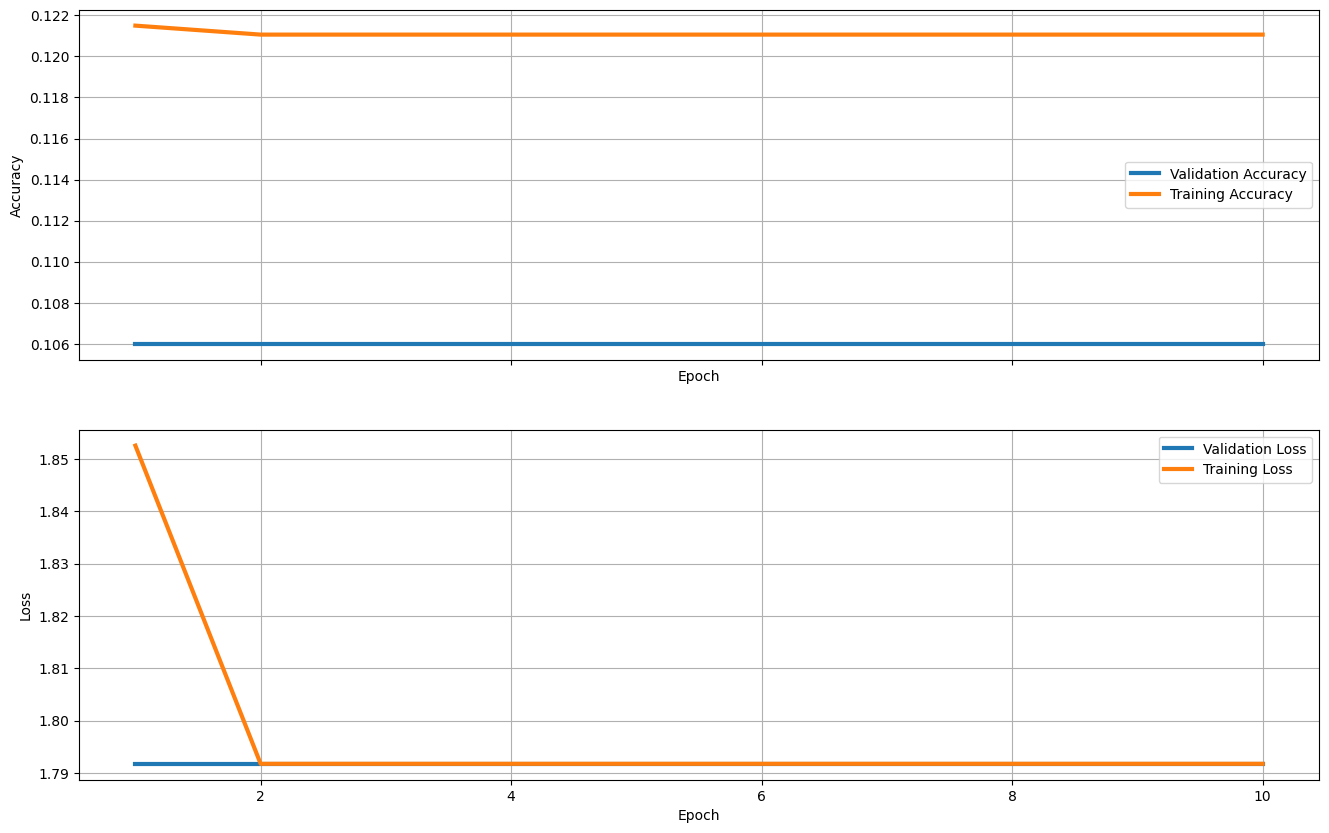

In [ ]:
plot_results(history_bert)

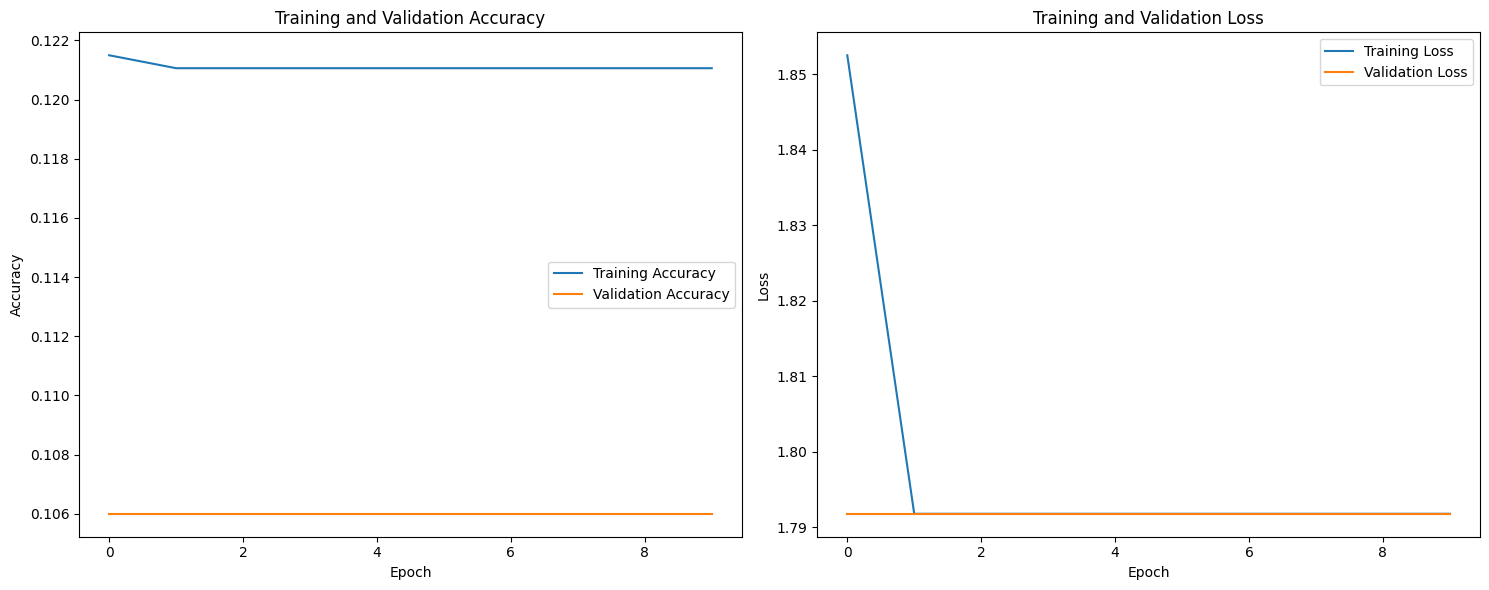

In [ ]:
visualization(history_bert)

#### <font color = 'green'> 4. Compare the different models to find the best approach and explained what you have learned from this exercise and how would you proceed with another text classification use case.

##### <font color = 'cyan'> To compare the different models used in this project, we would be evaluating the performances of each models on a held-out test set and compare key metrics such as accuracy, precision, recall, and F1-score.

##### <font color = 'cyan'> The following models will be compared:

##### <font color = 'cyan'> FCNN, LSTM, GRU

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

##### <font color = 'cyan'> Function to make predictions with the models

In [ ]:
def prediction_model(any_model, X_test_set):
  predictions = any_model.predict(X_test_set)
  return predictions.argmax(axis=1)

In [ ]:
# Make predictions using each model on the test_set
y_pred_fcnn = prediction_model(model_nn, X_test_pad)
y_pred_nn_opt = prediction_model(model_nn_opt, X_test_pad)
y_pred_lstm = prediction_model(model_lstm, X_test_pad)
y_pred_gru = prediction_model(model_gru, X_test_pad)
#y_pred_bert = prediction_model(model_bert, test_dataset)


63/63 [==============================] - 21s 76ms/step


##### <font color = 'cyan'> Evaluate Accuracies of all the models

In [ ]:
# The y_test_arr is one-hot encoded, converted to single-label format
y_test_single_label = np.argmax(y_test_arr, axis=1)

accuracy_fcnn = accuracy_score(y_test_single_label, y_pred_fcnn)
accuracy_nn_opt = accuracy_score(y_test_single_label, y_pred_nn_opt)
accuracy_lstm = accuracy_score(y_test_single_label, y_pred_lstm)
accuracy_gru = accuracy_score(y_test_single_label, y_pred_gru)

In [ ]:
# Accuracy results:
print("Accuracy - FCNN:", accuracy_fcnn)
print("Accuracy - nn_opt:", accuracy_nn_opt)
print("Accuracy - lstm:", accuracy_lstm)
print("Accuracy - GRU:", accuracy_gru)


Accuracy - FCNN: 0.8205
Accuracy - nn_opt: 0.3515
Accuracy - lstm: 0.9185
Accuracy - GRU: 0.9235


In [ ]:
# Display classification reports for detailed metrics of all the models
print("\nClassification Report - FCNN:")
print(classification_report(y_test_single_label, y_pred_fcnn))


print("\nClassification Report - NN_Opt:")
print(classification_report(y_test_single_label, y_pred_nn_opt))


print("\nClassification Report - LSTM:")
print(classification_report(y_test_single_label, y_pred_lstm))


print("\nClassification Report - GRU:")
print(classification_report(y_test_single_label, y_pred_gru))



Classification Report - FCNN:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       275
           1       0.77      0.81      0.79       224
           2       0.85      0.87      0.86       695
           3       0.63      0.64      0.64       159
           4       0.90      0.85      0.87       581
           5       0.67      0.59      0.63        66

    accuracy                           0.82      2000
   macro avg       0.77      0.76      0.76      2000
weighted avg       0.82      0.82      0.82      2000


Classification Report - NN_Opt:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       275
           1       0.00      0.00      0.00       224
           2       0.35      0.86      0.50       695
           3       0.00      0.00      0.00       159
           4       0.34      0.18      0.24       581
           5       0.00      0.00      0.00        66

    accuracy 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



<font color = 'cyan'> **After comparing the results, we obsereved that `RNN` with `GRU` performs better on all the sentiments classes. The accuracy of the GRU was 0.9235 which is only measuring the probability of true predictions.**

<font color = 'cyan'> **This was validated with the GRU precision weighted average of 0.92, same as F1-score and recall. The essence of considering these metrics is to correct imbalances on the dataset.**

##### <font color = 'green'> Key takeaways from the comparison may include:
<font color = 'cyan'> **Some models may perform better on certain sentiment classes in the case of LSTM and GRU, they performed better than FCNN. The BERT model performed poorly on the sentimental analysis in this case but it could also be as result of the choice of model I chosed. Further works, will be done on this aspect to see why the BERT models perfpormed poorly.**

<font color = 'cyan'> **The Overfitting problems that other models used shows were corrected by LSTM and GRU models despite training less parameters compared to fully connected neural network.**

<font color = 'cyan'> **With 10 Epochs set for each models, The training time and resource requirements were less in LSTM and GRU compared to BERT pretrained models.**

<font color = 'cyan'> **Based on these observations, We recommend that the best approach is the Recurrent Neural Network with GRU for sentimental classification analysis.**

<font color = 'cyan'> **Following all established data preprocessing steps in this project, to attempt any other classification task, I will develop more skills in identifying the best pre-trained models will adaptible for specific classification tasks. Also, I will train the models for more number of Epochs**

##### <font color = 'cyan'> Saving the Best Model

##### <font color = 'cyan'> We would save the best model to include its architecture, weights and optimizer state.

In [ ]:
model_gru.save(model_path + "model_gru_v1.h5")